### SNR

In [1]:
import pandas as pd
from scipy.stats import ttest_ind
import numpy as np
import scipy
from tqdm import tqdm, trange
#from tqdm import tnrange,tqdm_notebook
import matplotlib.pyplot as plt
from scipy.stats import t
import matplotlib.pyplot as plt
import gmpy2
from gmpy2 import mpz,mpq,mpfr,mpc
import os
import scipy.io as sio
import matplotlib.pyplot as plt
from tqdm import tnrange,tqdm_notebook

In [2]:
d_len = 25000
d_file_len = 500

In [3]:
def concatDataTraces(path):
    mats = []
    index = 0 
    fileNames = np.arange(50, (d_len + 50), 50).tolist()
    for file in os.listdir(path):
        mats.append(sio.loadmat(path+"traces_"+ str(fileNames[index]) +".mat", verify_compressed_data_integrity=False))
        index = index + 1
    mats = np.array(mats)
    myArray = []
    
    for i in range(0,d_file_len):
        for j in range(0,50):
            myArray.append(mats[i]['data'][j])
    return(myArray)

In [4]:
def concatDataLabel(path):
    mats = []
    index = 0 
    fileNames = np.arange(50, (d_len + 50), 50).tolist()
    for file in os.listdir(path):
        mats.append(sio.loadmat(path+"labels_"+ str(fileNames[index]) +".mat", verify_compressed_data_integrity=False))
        index = index + 1
    mats = np.array(mats) 
    myArray = []
    for i in range(0,d_file_len):
        for j in range(0,50):
            myArray.append(mats[i]['data'][0][j])
    return(myArray)

### Load traces

In [5]:
df_data = concatDataTraces('../real_traces/SBOX_traces_25k_share1/spot_4_12/traces/')
df_data = np.array(df_data)

In [6]:
df_label = concatDataLabel('../real_traces/SBOX_traces_25k_share1/spot_4_12/label/')
df_label = np.array(df_label)

In [7]:
df_new_label = []
for i in df_label:
    df_new_label.append([i])

In [8]:
df_full_data = np.append(df_data, df_new_label, axis=1)

In [9]:
#last entry (label)
df_full_data[0][-1]

129

In [10]:
df_full_data_sort = df_full_data[df_full_data[:,-1].argsort()]

In [11]:
len(df_full_data_sort[0])

250001

In [12]:
tmpPv = -1
mainIndex = 0

TMP_ROWS = []
meanRows = []
varRows = []

for i in df_full_data_sort:
    tmpCv = i[-1]
    
    if tmpCv == tmpPv:
        TMP_ROWS.append(i[0:250000])
    else:
        
        if mainIndex != 0:
            
            TMP_ROWS=np.array(TMP_ROWS)
            
            #mean
            tmp = TMP_ROWS.mean(axis=0)
            meanRows.append(tmp)
            
            #var
            tmp2 = TMP_ROWS.var(axis=0)
            varRows.append(tmp2)
            
            TMP_ROWS = []
            TMP_ROWS.append(i[0:250000])
            
        tmpPv = i[-1]
        
    if mainIndex == (len(df_full_data_sort) -1):

        TMP_ROWS=np.array(TMP_ROWS)
        
        #mean
        tmp = TMP_ROWS.mean(axis=0)
        meanRows.append(tmp)
        
        #var
        tmp2 = TMP_ROWS.var(axis=0)
        varRows.append(tmp2)
        
        TMP_ROWS = []
        
    mainIndex = mainIndex + 1

In [13]:
len(meanRows)

256

In [14]:
dev_VAR = []
tmp_prod_VAR = []
tmp_sum_VAR = []

res_MEAN = []
res_VAR = []


for i in tnrange(0,len(varRows[0])):
   
    TMP_ROWS_MEAN = []
    TMP_ROWS_VAR =[]
    
    for j in range(0,256):
        TMP_ROWS_MEAN.append(meanRows[j][i])
        TMP_ROWS_VAR.append(varRows[j][i])
    
    res_MEAN.append(np.array(TMP_ROWS_MEAN).var())
    res_VAR.append(np.array(TMP_ROWS_VAR).mean())

In [15]:
len(res_VAR)

250000

In [16]:
SNR = np.array(res_MEAN) / np.array(res_VAR)

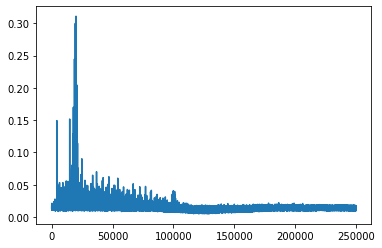

In [17]:
plt.plot(SNR)